In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(iris.data, columns=columns)
df['target'] = iris.target
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


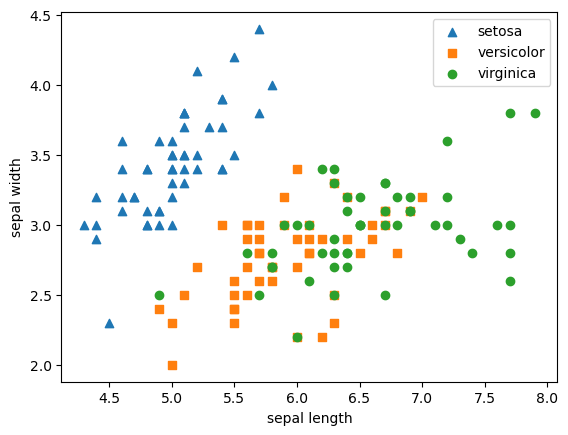

In [12]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x = df[df['target']==i]['sepal_length']
    y = df[df['target']==i]['sepal_width']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(df.iloc[:,:-1])

In [22]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [23]:
df_pca = pd.DataFrame(iris_pca, columns=['pca1', 'pca2'])
df_pca['target'] = iris.target
df_pca.head(3)

,pca1,pca2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


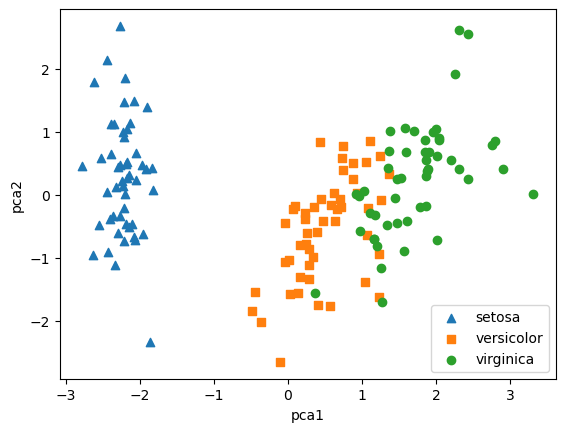

In [24]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x = df_pca[df_pca['target']==i]['pca1']
    y = df_pca[df_pca['target']==i]['pca2']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [17]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [25]:
0.72962445+0.22850762

0.95813207

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [27]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [30]:
df_pca
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,df_pca.iloc[:,:-1],df_pca.iloc[:,-1],scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.88 0.88 0.88]
0.88


In [29]:
pca_X = df_pca[['pca1', 'pca2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [21]:
# 6장 12페이지